In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Exploratory analysis on truck H476

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import datetime
from folium import plugins

# GPS Critical Alarm Hotspots

In [10]:
# Import and clean out the nan from the NotificationDetailsReport
notification_df = pd.read_csv('C:/Users/codyg/Desktop/BCData2018/Maintenance/NotificationDetailsReport.csv')
notification_df['GPSLocation'] = notification_df['GPSLocation'].astype(str)
notification_df = notification_df[~(notification_df['GPSLocation']=='nan')]

# Map the GPS data to Latitude and longitude
f = lambda x : x[:x.find(':')-1]
g = lambda y : y[y.find(':')+1:]
notification_df['Long'] = notification_df['GPSLocation'].apply(f)
notification_df['Lat'] = notification_df['GPSLocation'].apply(g)

notification_df['Long'] = pd.to_numeric(notification_df['Long']) * (0.00000360715054381839) - 117.234704527191
notification_df['Lat'] = pd.to_numeric(notification_df['Lat']) * (0.00000274396439452962) + 40.6886779177036 

# Pull a specific truck and alarm level, take the next 'big' data points starting at 'x' and plot this on a map
big = 1100

truck = 'HT476'
level = 1

x=0
test = notification_df[notification_df['EquipmentName'] == truck]
test = test[test['Level']==level]
test = test.iloc[x:x+big]

a = np.mean(test['Lat'])
b = np.mean(test['Long'])
m = folium.Map(location = [a, b], zoom_start = 13)

    # mark each alarm as a point
for index, row in test.iterrows():
    folium.CircleMarker([row['Lat'], row['Long']],
                        radius=.5).add_to(m)
# convert to (n, 2) nd-array format for heatmap
paths = test[['Lat', 'Long']].values
paths = paths.tolist()

# plot heatmap
m.add_child(plugins.HeatMap(paths, radius=10))
del notification_df,test
m

# Summary of total number of breakdowns

In [11]:
df1 = pd.read_csv('C:/Users/codyg/Desktop/BCData2018/Maintenance/WorkOrders.csv')
#Extract all data corresponding to truck 476
workOrder476 = df1[df1['COMPID']==476]
#24V MECHANICAL, HV ELECTRICAL, ENGINES, HYDRAULIC HOSES & FITTINGS, TIRES, CAB, SAFETY, RADIOS, FRAME AND BODY, STEERING SYSTEM, BRAKES,LUBRICANTS
breakDown476 = workOrder476[workOrder476['SCHEDULED']=='UNSCHEDULED']
mechanicalFailure = breakDown476[breakDown476['ACCTDESC']=='24V MECHANICAL']
print("total number of mechanical failure is %s" % (mechanicalFailure.shape[0]))
hydraulicFailure = breakDown476[breakDown476['ACCTDESC']=='HYDRAULIC HOSES & FITTINGS']
print("total number of HYDRAULIC HOSES & FITTINGS failure is %s" % (hydraulicFailure.shape[0]))
engineFailure = breakDown476[breakDown476['ACCTDESC']=='ENGINES']
print("total number of engine failure is %s" % (engineFailure.shape[0]))
electricalFailure = breakDown476[breakDown476['ACCTDESC']=='HV ELECTRICAL']
print("total number of electrical failure is %s" % (electricalFailure .shape[0]))
frameFailure = breakDown476[breakDown476['ACCTDESC']=='FRAME AND BODY']
print("total number of FRAME AND BODY failure is %s" % (frameFailure.shape[0]))
tireFailure = breakDown476[breakDown476['ACCTDESC']=='TIRES']
print("total number of tires failure is %s" % (tireFailure.shape[0]))
breaksFailure = breakDown476[breakDown476['ACCTDESC']=='BRAKES']
print("total number of Breaks failure is %s" % (breaksFailure.shape[0]))
steeringFailure = breakDown476[breakDown476['ACCTDESC']=='STEERING SYSTEM']
print("total number of STEERING SYSTEM failure is %s" % (steeringFailure.shape[0]))

del df1,breakDown476,mechanicalFailure,hydraulicFailure,engineFailure,electricalFailure,frameFailure,breaksFailure,steeringFailure


total number of mechanical failure is 20
total number of HYDRAULIC HOSES & FITTINGS failure is 3
total number of engine failure is 10
total number of electrical failure is 2
total number of FRAME AND BODY failure is 6
total number of tires failure is 0
total number of Breaks failure is 5
total number of STEERING SYSTEM failure is 0


# Time Series plot of Work Orders

C:\Users\codyg\.julia\v0.6\Conda\deps\usr\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\codyg\.julia\v0.6\Conda\deps\usr\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


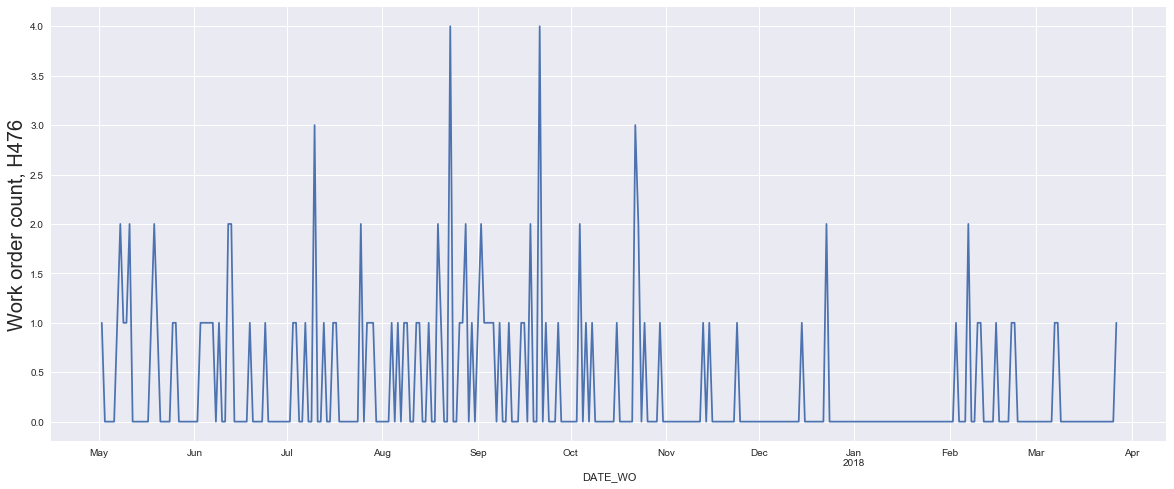

In [12]:
directory = 'C:/Users/codyg/Desktop/BCData2018/Maintenance/WorkOrders.csv'
# import maintenance data (for one truck), replace with your downloaded directory
workorders_df = pd.read_csv(directory)

# filter the unscheduled work orders 
filtered_unscheduled_df = workorders_df[workorders_df['SCHEDULED'] == 'UNSCHEDULED']
truck_476_df = filtered_unscheduled_df[filtered_unscheduled_df['COMPID'] == 476]
truck_476_df.loc['DATE_WO'] = pd.to_datetime(truck_476_df['DATE_WO'])
truck_476_df.set_index('DATE_WO', inplace = True)
truck_476_df.index = pd.to_datetime(truck_476_df.index)
truck_476_df['count'] = np.ones(len(truck_476_df))
truck_476_ts = truck_476_df['count'].resample(rule = 'D').count()
truck_476_ts.plot(figsize=(20,8))
plt.ylabel('Work order count, H476', fontsize = 20)

del workorders_df, filtered_unscheduled_df, truck_476_df, truck_476_ts

<img src="challenges_ssr.png" alt="wali_476" width="900px"/>

# An example of necessary data cleaning

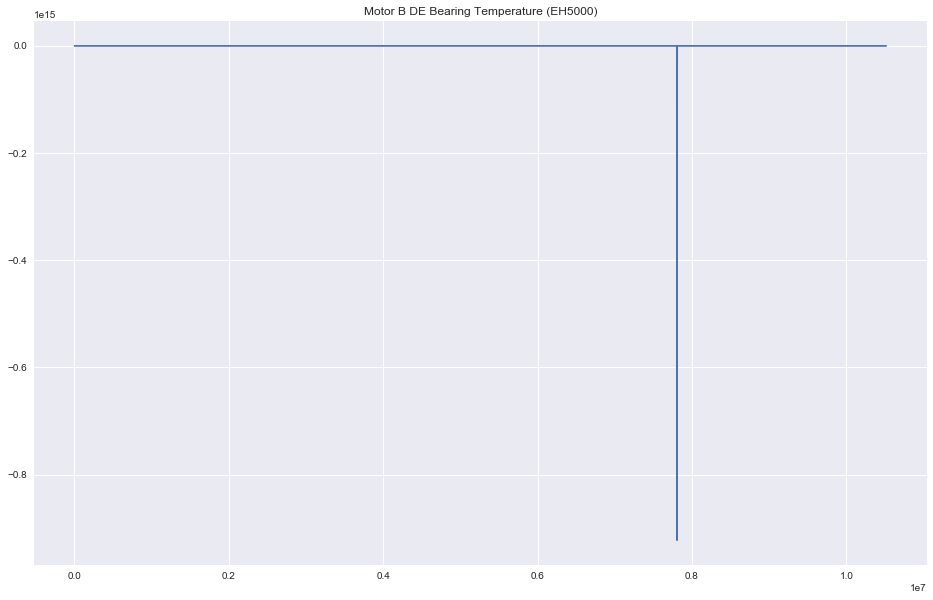

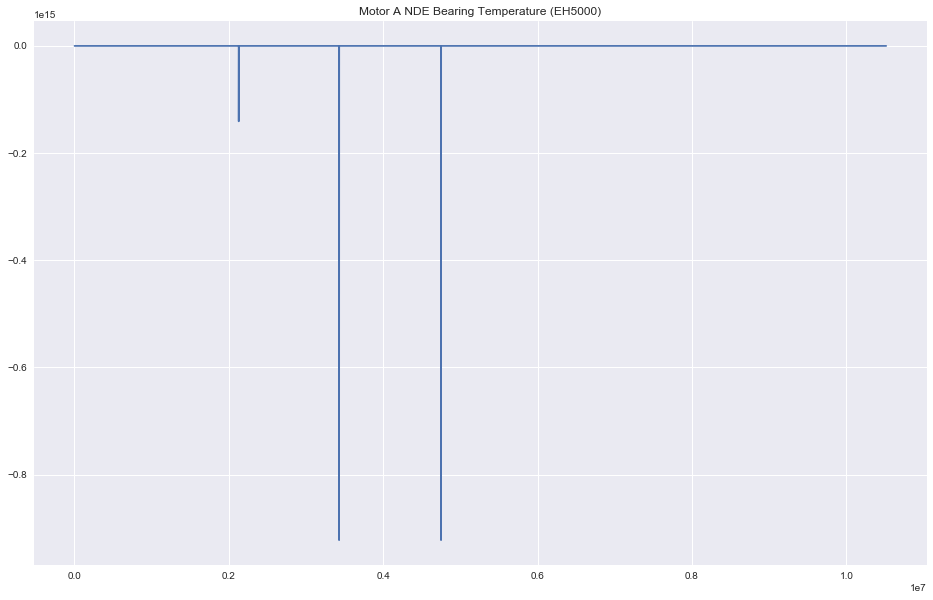

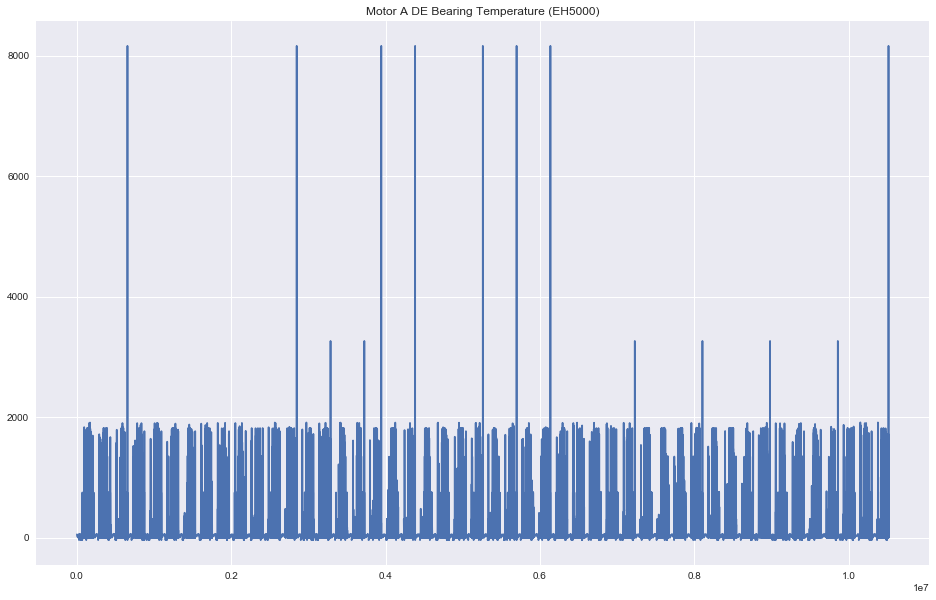

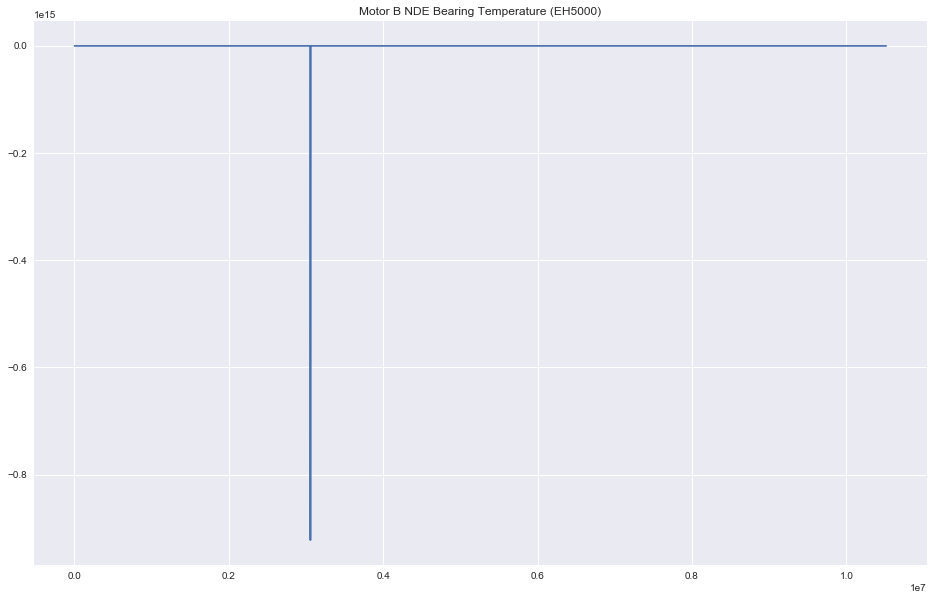

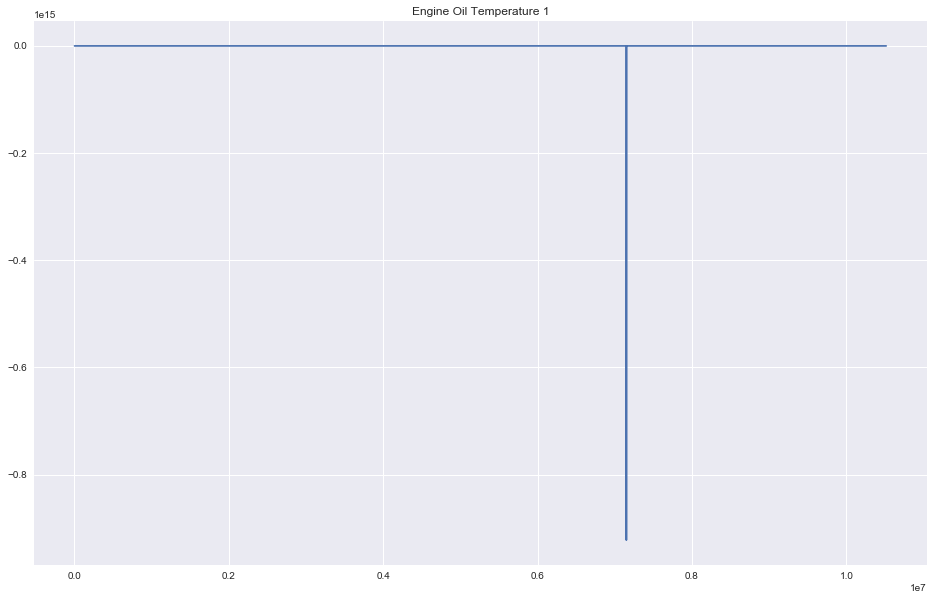

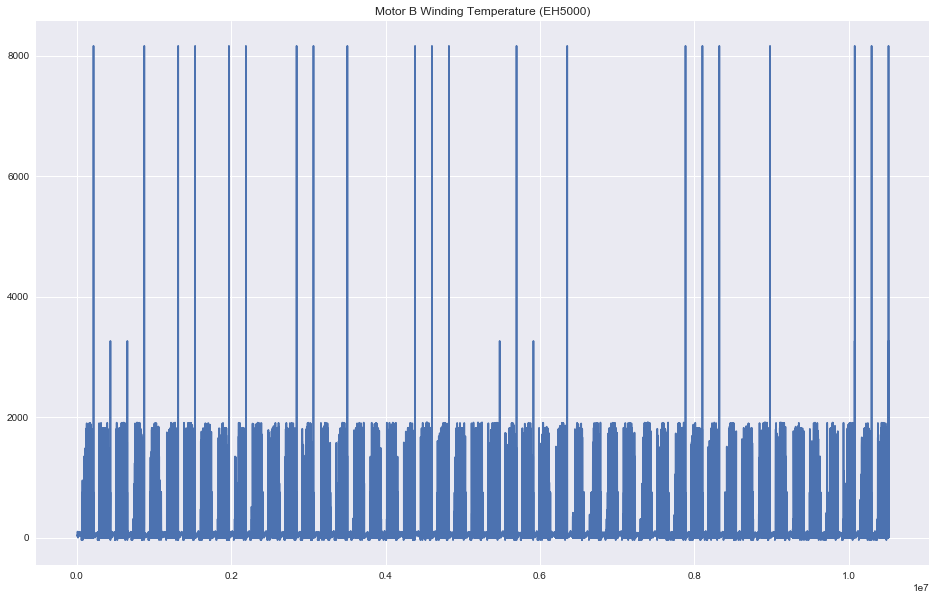

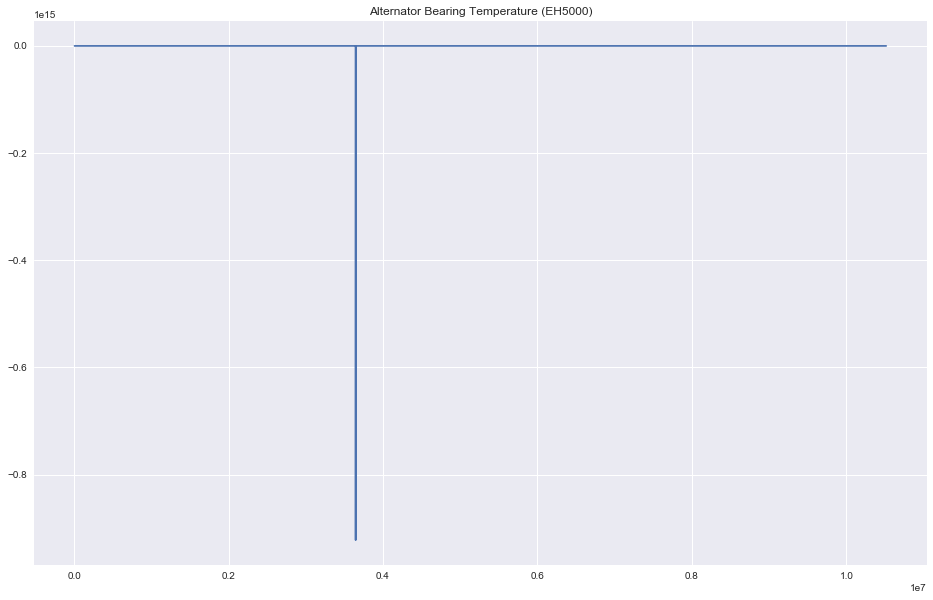

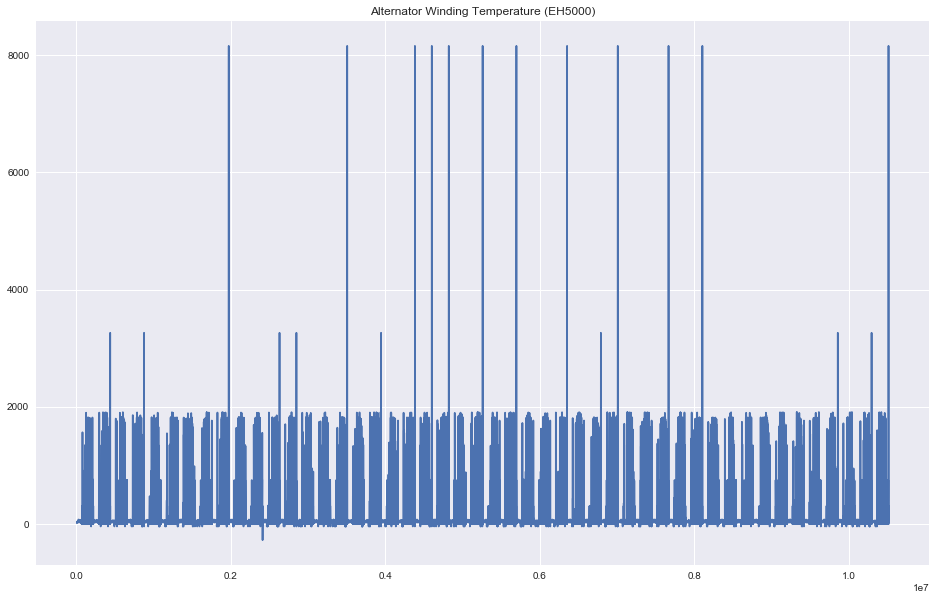

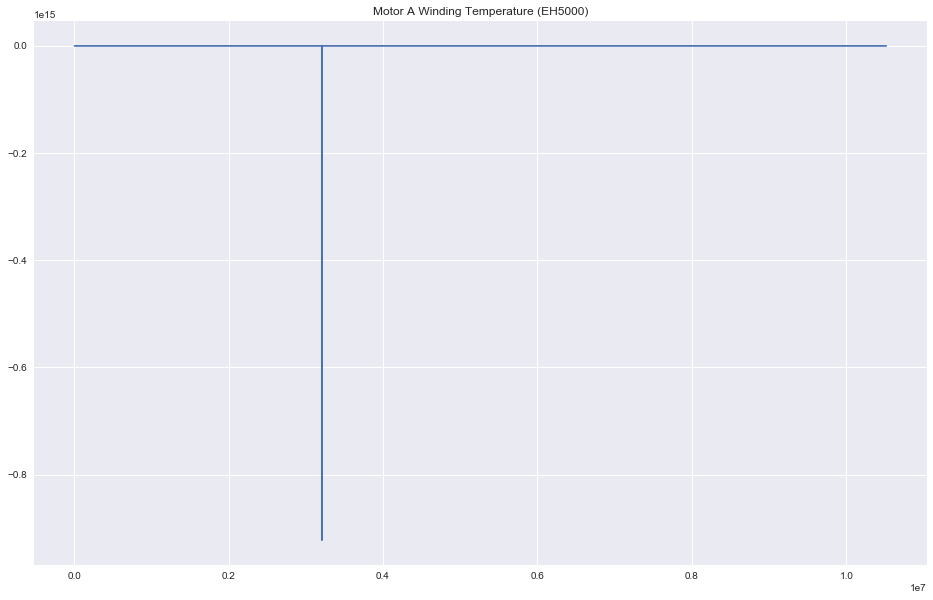

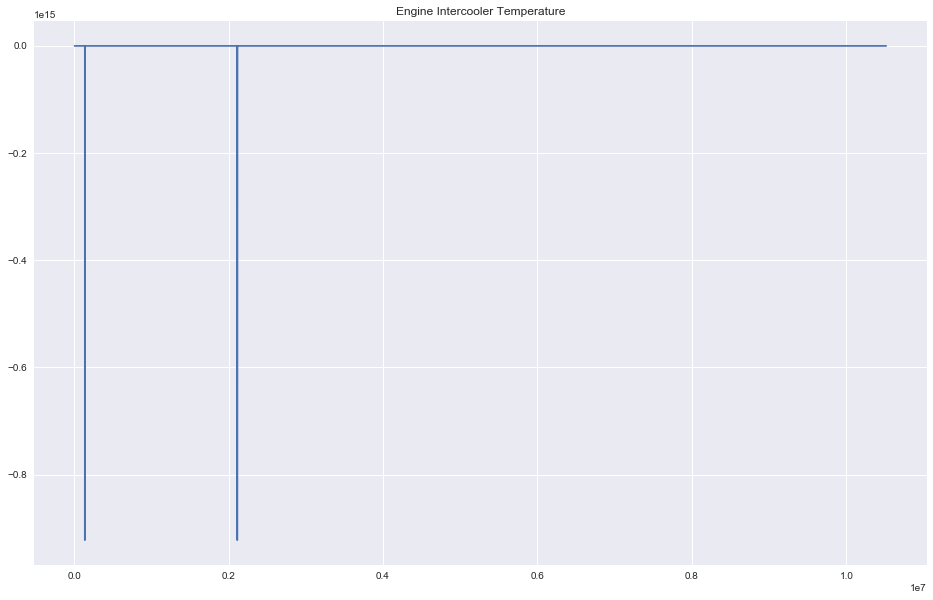

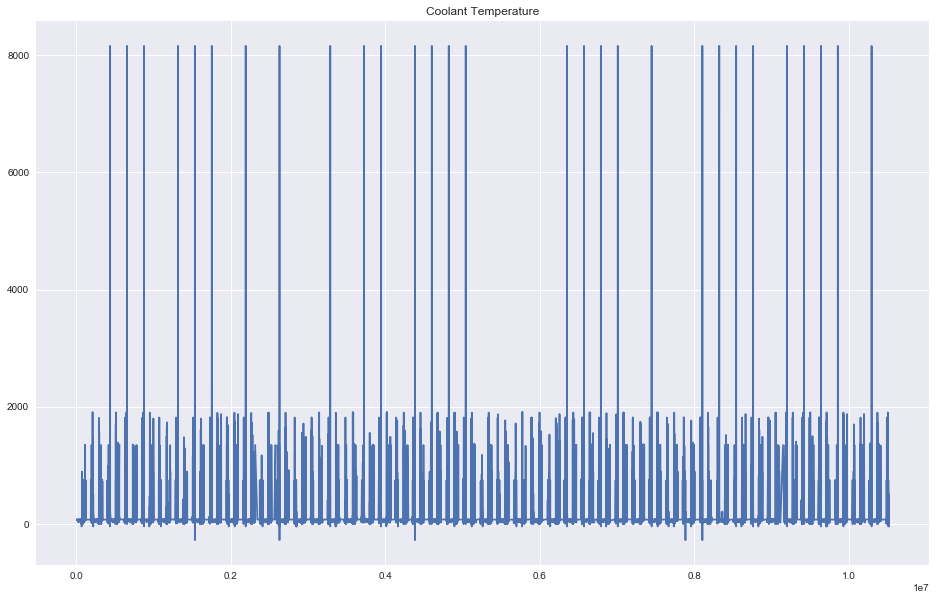

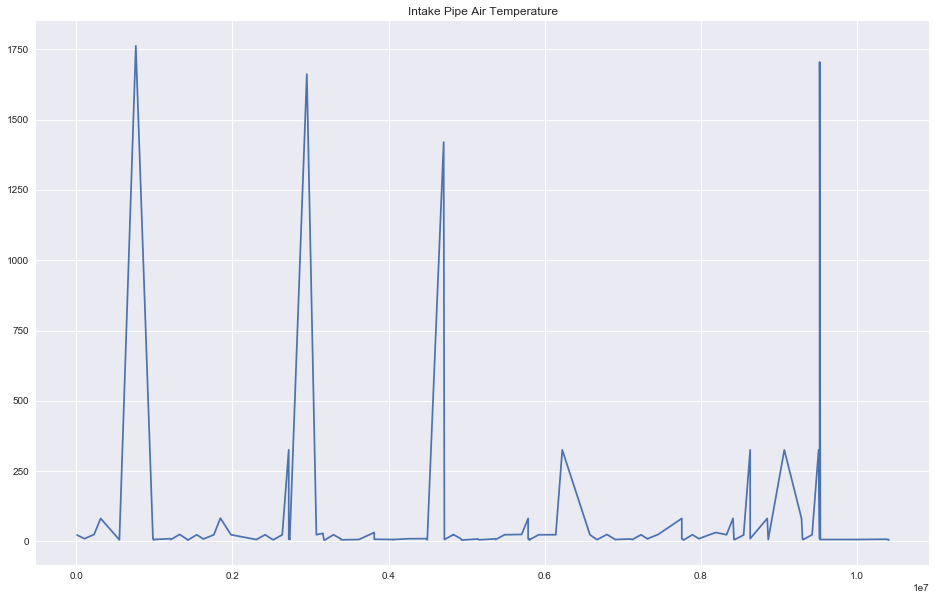

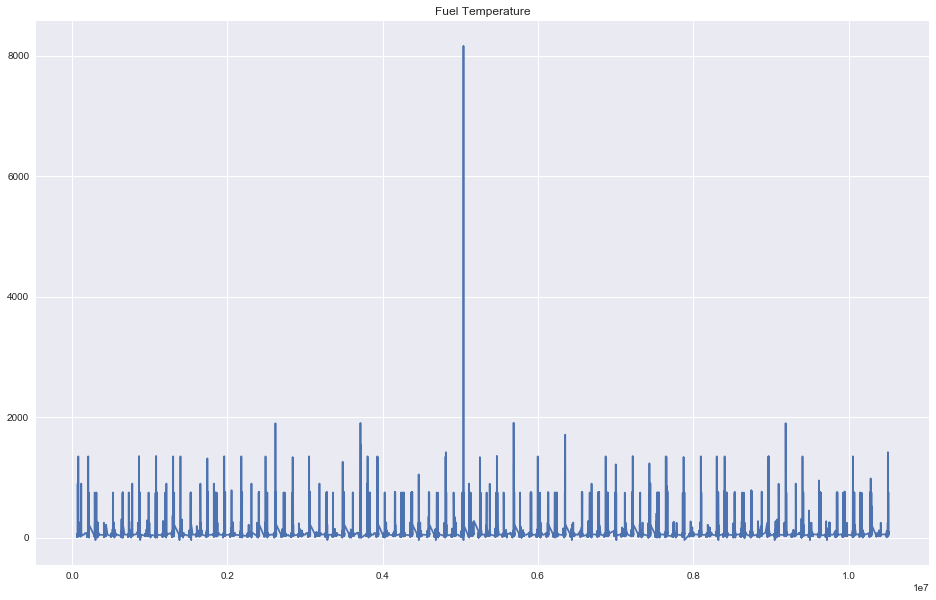

In [5]:
HT476_data_file = pd.read_csv("C:/Users/codyg/Desktop/BCData2018/Maintenance/TruckMachineData/TruckMachineData_HT476.csv")
pd.options.display.max_columns = 50

plt.style.use('seaborn')

parameters_label_col = HT476_data_file['Parameter']
parameters_value_col = HT476_data_file['ParameterValue']

# Get all the rows with paramater labels containing the word "Temperature"

rows_with_temperature = HT476_data_file[HT476_data_file['Parameter'].str.contains("Temperature")]

# Print each temperature item with time vs temperature

parameter_label_list = []

for parameter_label in rows_with_temperature['Parameter']:
    
    if(parameter_label not in parameter_label_list):
        
        parameter_label_list.append(parameter_label)

list(parameter_label_list)

# For each parameter label, we will save it's corresponding parameter values

import matplotlib.pyplot as plt
import numpy as np

# Seperate the relevant columns

temperature_labels_column = rows_with_temperature['Parameter']
temperature_values_column = rows_with_temperature['ParameterValue']

# Plot each temperature

def plot_temperatures():

    for label in parameter_label_list:

        current_temp_label = temperature_labels_column[temperature_labels_column == label]
        current_index = current_temp_label.index
        current_temp_value = temperature_values_column[current_index]
        
        plt.figure(figsize=(16,10))
        plt.plot(current_temp_value)
        plt.title(label)
        plt.show()
        
plot_temperatures()
        
for label in parameter_label_list:
    
    current_temp_label = temperature_labels_column[temperature_labels_column == label]
    current_index = current_temp_label.index
    current_temp_value = temperature_values_column[current_index]

# Autoencoder approach
<img src="shams_autoencoder.png" alt="auto" width="800px"/>

# Correlation matrix between mechanical parts
<img src="correlation.png" alt="correlation" width="500px"/>

# Demonstration of future work

<img src="goal_ssr.png" alt="correlation" width="800px"/>

C:\Users\codyg\.julia\v0.6\Conda\deps\usr\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


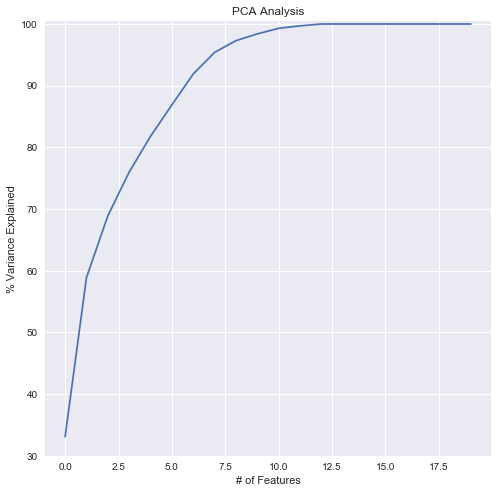

In [14]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline
loan = pd.read_csv('~/Downloads/loan.csv').sample(frac = .25) #read the dataset and sample 25% of it
len(loan.columns)
#Data Wrangling
loan.replace([np.inf, -np.inf], np.nan) #convert infs to nans
loan = loan.dropna(axis = 1, how = 'any') #remove nans
loan = loan._get_numeric_data() #keep only numeric features
x = loan.values #convert the data into a numpy array
x = scale(x);x
covar_matrix = PCA(n_components = 20) 
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

del loan

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
plt.figure(figsize = (8,8))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

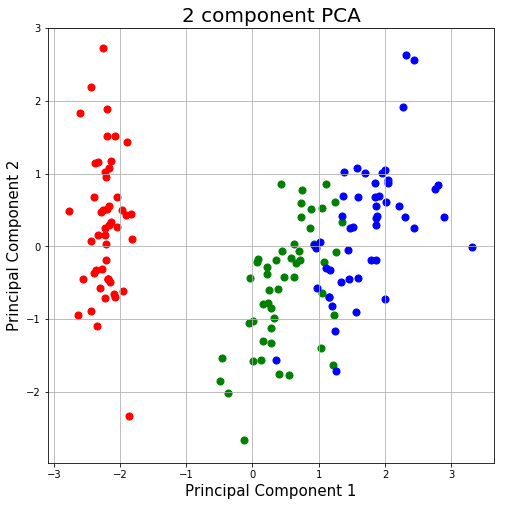

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca.explained_variance_ratio_
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.grid()

### From this stage, clustering could be done to determine the boundaries for critical alarms for these components.

# Thanks to the wonderful organizers and to SSR!